In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, NMF, PCA, RegressionModel, Colorize,Registration
import numpy as np
import scipy.io
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')

norm = tsc.loadImages('/mnt/downloads/20150520/2/', inputFormat='tif')

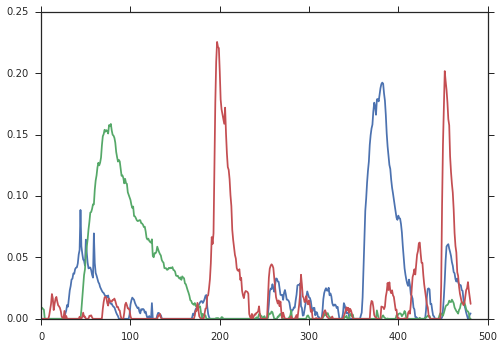

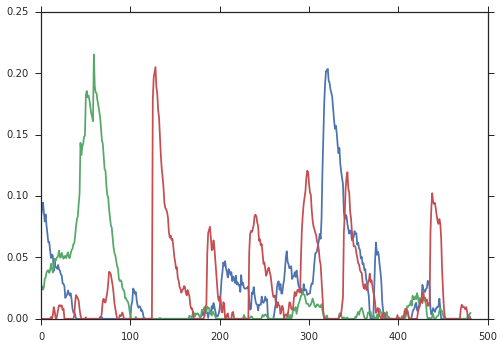

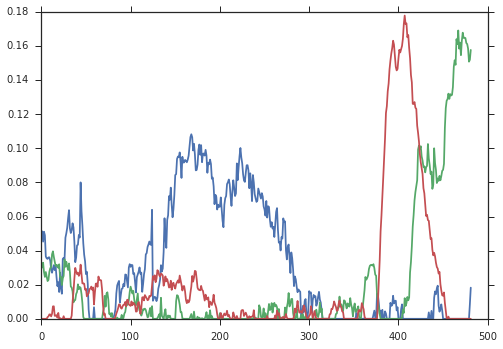

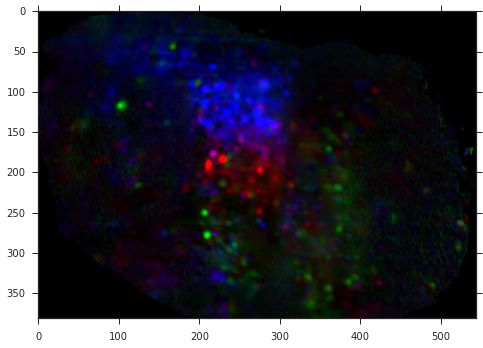

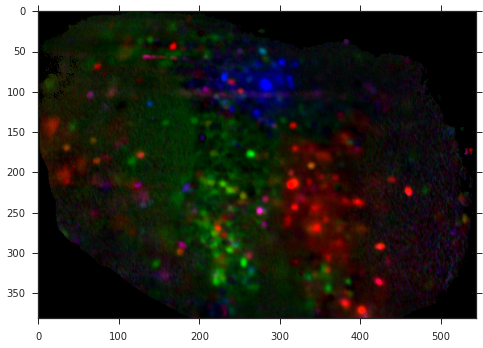

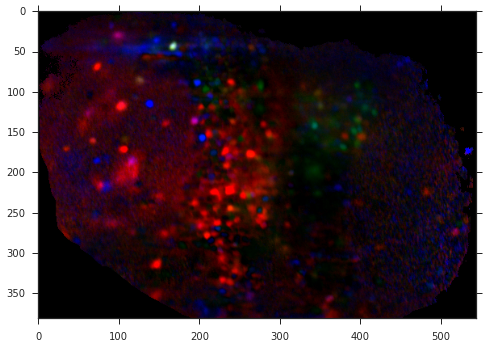

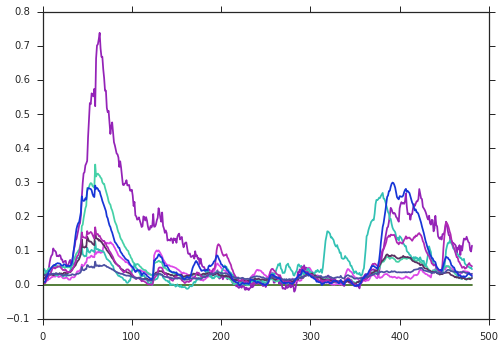

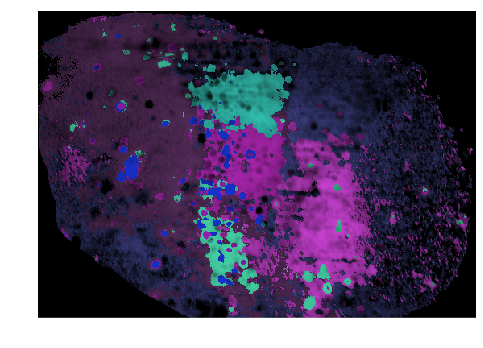

In [20]:
def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y

norm = norm.toTimeSeries(size="64M")
norm=norm.squelch(1000).normalize(baseline='percentile')
norm.cache()
fig = figure(dpi=300)
model = NMF(k=9, maxIter=50).fit(norm)
plt.plot(model.h.T[:,0:3]);
plt.savefig('/mnt/downloads/Lucy/NMF1-2.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
plt.plot(model.h.T[:,3:6]);
plt.savefig('/mnt/downloads/Lucy/NMF2-2.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
plt.plot(model.h.T[:,6:9]);
plt.savefig('/mnt/downloads/Lucy/NMF3-2.png', dpi=300, bbox_inches='tight')
imgs = model.w.pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[0:3])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb1-2.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[3:6])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb2-2.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[6:9])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb3-2.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
model=KMeans(k=9).fit(norm)
newclrs = Colorize.optimize(model.centers, asCmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model.centers.T);
plt.savefig('/mnt/downloads/Lucy/Kmeans5-2.png', dpi=300, bbox_inches='tight')
imgLabels = model.predict(norm).pack()
sim = model.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
fig = figure(dpi=300)
image(brainmap)
plt.savefig('/mnt/downloads/Lucy/Kmeans5b-2.png', dpi=300, bbox_inches='tight')

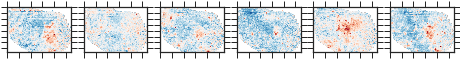

In [21]:
test = np.zeros((6,482),dtype=np.int)
test[0,117:132]=1
test[1,181:196]=1
test[2,293:308]=1
test[3,344:359]=1
test[4,448:463]=1
test[5,117:132]=1
test[5,181:196]=1
test[5,293:308]=1
test[5,344:359]=1
test[5,448:463]=1
from matplotlib import pylab
sns.axes_style('ticks')
fig = figure(dpi=300)
fig, axes = plt.subplots(1, test.shape[0])
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat = center(corrs.pack())
	plt.subplot(1, test.shape[0], j+1)
	plt.imshow(corrMat, cmap='RdBu_r')
	ax = plt.gca()
	ax.set_xticklabels([])
	ax.set_yticklabels([])
plt.savefig('/mnt/downloads/Lucy/correlation-2.png', dpi=300, bbox_inches='tight')

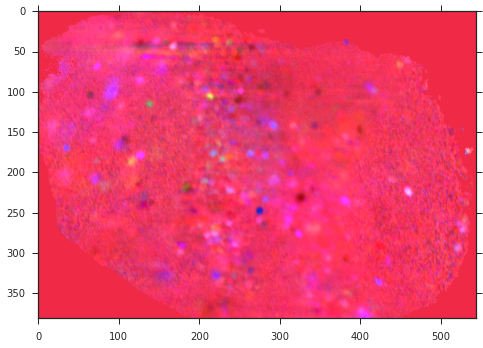

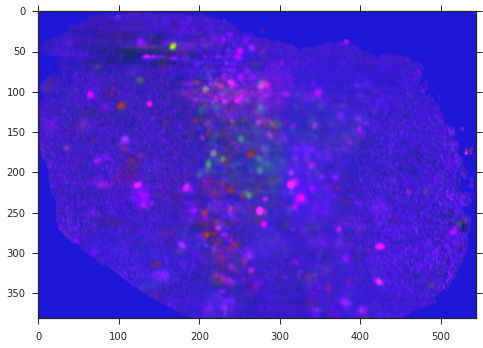

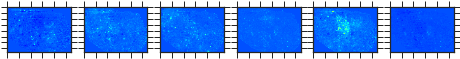

In [22]:
model = RegressionModel.load(test, "linear")
results = model.fit(norm)
betas=results.select('betas').pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[0:3])
plt.imshow(maps)
plt.savefig('/mnt/downloads/Lucy/linreg-2.png', dpi=300, bbox_inches='tight')
if test.shape[0]>3:   
	fig = figure(dpi=300)
	lower=test.shape[0]-3
	upper=test.shape[0]        
	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[lower:upper])
	plt.imshow(maps)
	plt.savefig('/mnt/downloads/Lucy/linreg2-2.png', dpi=300, bbox_inches='tight')
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	n=betas[j,]
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
	ax = plt.gca()
	ax.set_xticklabels([])
	ax.set_yticklabels([])
plt.savefig('/mnt/downloads/Lucy/linregb-2.png', dpi=300, bbox_inches='tight')

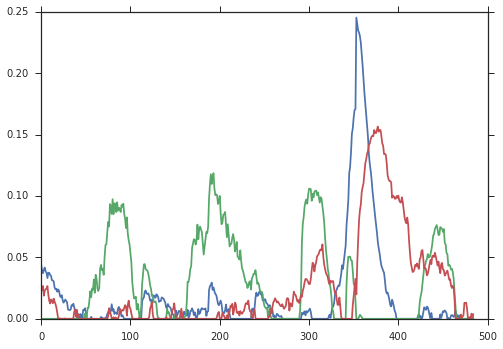

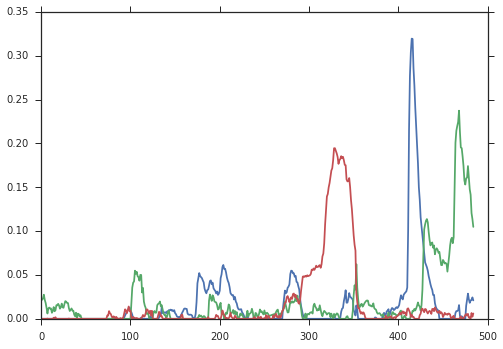

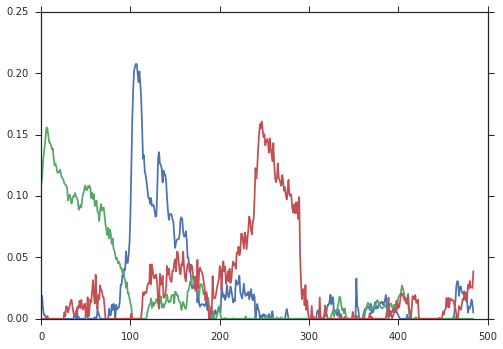

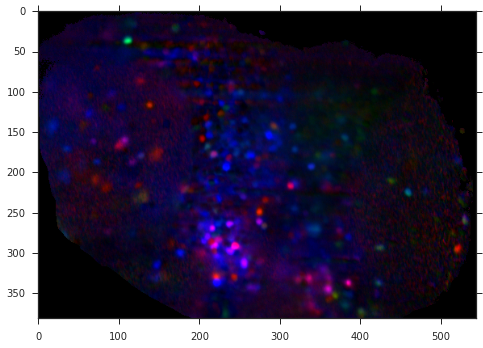

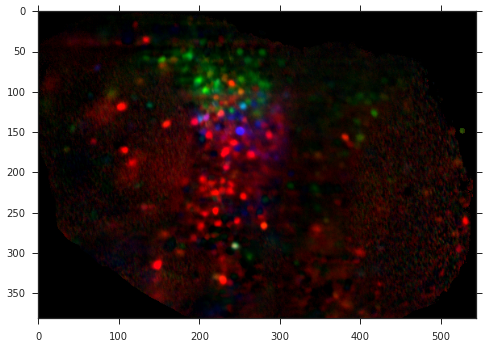

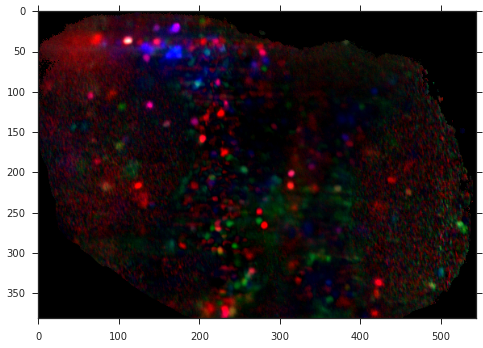

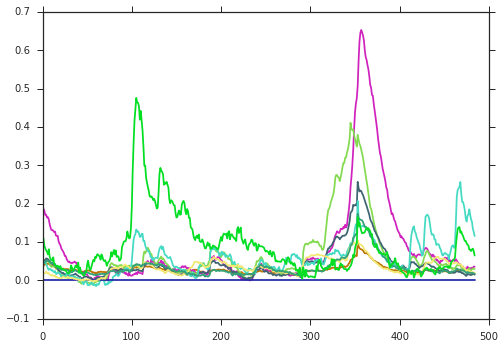

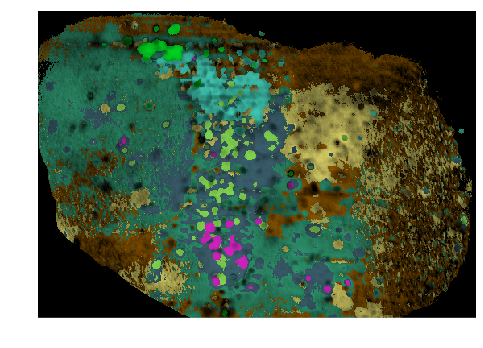

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, NMF, PCA, RegressionModel, Colorize,Registration
import numpy as np
import scipy.io
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')

norm = tsc.loadImages('/mnt/downloads/20150520/1/', inputFormat='tif')
def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y

norm = norm.toTimeSeries(size="64M")
norm=norm.squelch(1000).normalize(baseline='percentile')
norm.cache()
fig = figure(dpi=300)
model = NMF(k=9, maxIter=50).fit(norm)
plt.plot(model.h.T[:,0:3]);
plt.savefig('/mnt/downloads/Lucy/NMF1-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
plt.plot(model.h.T[:,3:6]);
plt.savefig('/mnt/downloads/Lucy/NMF2-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
plt.plot(model.h.T[:,6:9]);
plt.savefig('/mnt/downloads/Lucy/NMF3-1.png', dpi=300, bbox_inches='tight')
imgs = model.w.pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[0:3])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb1-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[3:6])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb2-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[6:9])
plt.imshow(maps);
plt.savefig('/mnt/downloads/Lucy/NMFb3-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
model=KMeans(k=9).fit(norm)
newclrs = Colorize.optimize(model.centers, asCmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model.centers.T);
plt.savefig('/mnt/downloads/Lucy/Kmeans5-1.png', dpi=300, bbox_inches='tight')
imgLabels = model.predict(norm).pack()
sim = model.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
fig = figure(dpi=300)
image(brainmap)
plt.savefig('/mnt/downloads/Lucy/Kmeans5b-1.png', dpi=300, bbox_inches='tight')

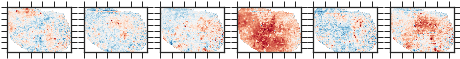

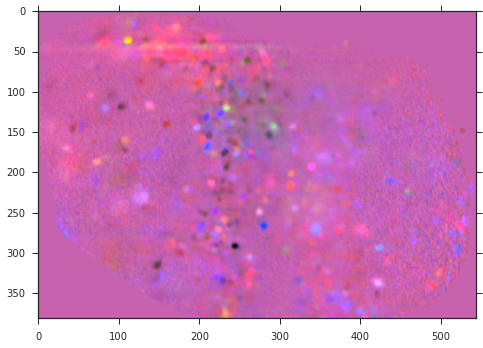

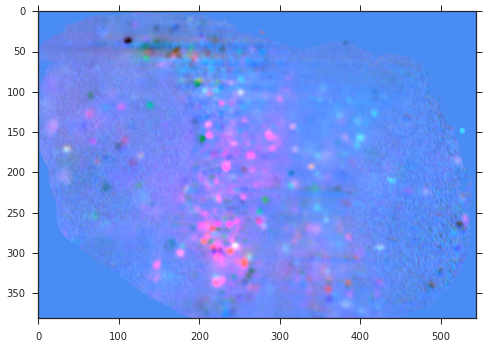

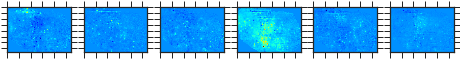

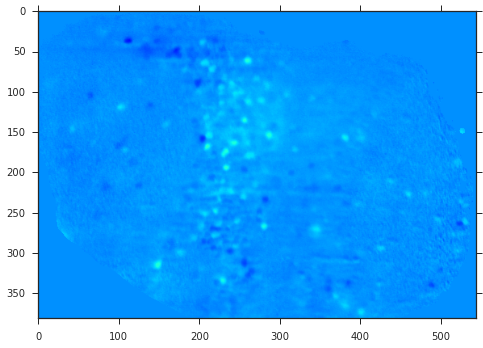

In [26]:
test = np.zeros((6,485),dtype=np.int)
test[0,117:132]=1
test[1,191:206]=1
test[2,295:310]=1
test[3,345:360]=1
test[4,450:465]=1
test[5,117:132]=1
test[5,185:200]=1
test[5,290:305]=1
test[5,335:350]=1
test[5,428:443]=1
from matplotlib import pylab
sns.axes_style('ticks')
fig = figure(dpi=300)
fig, axes = plt.subplots(1, test.shape[0])
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat = center(corrs.pack())
	plt.subplot(1, test.shape[0], j+1)
	plt.imshow(corrMat, cmap='RdBu_r')
	ax = plt.gca()
	ax.set_xticklabels([])
	ax.set_yticklabels([])
plt.savefig('/mnt/downloads/Lucy/correlation2-1.png', dpi=300, bbox_inches='tight')

model = RegressionModel.load(test, "linear")
results = model.fit(norm)
betas=results.select('betas').pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[0:3])
plt.imshow(maps)
plt.savefig('/mnt/downloads/Lucy/linreg2-1.png', dpi=300, bbox_inches='tight')
if test.shape[0]>3:   
	fig = figure(dpi=300)
	lower=test.shape[0]-3
	upper=test.shape[0]        
	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[lower:upper])
	plt.imshow(maps)
	plt.savefig('/mnt/downloads/Lucy/linreg3-1.png', dpi=300, bbox_inches='tight')
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	n=betas[j,]
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
	ax = plt.gca()
	ax.set_xticklabels([])
	ax.set_yticklabels([])
plt.savefig('/mnt/downloads/Lucy/linregb2-1.png', dpi=300, bbox_inches='tight')
fig = figure(dpi=300)
n=betas[5,]
plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
plt.savefig('/mnt/downloads/Lucy/linregtot-1.png', dpi=300, bbox_inches='tight')

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, NMF, PCA, RegressionModel, Colorize, Registration
import numpy as np
import scipy.io
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')
plt.ioff()

def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y


def analysis( int,array ):
    
	norm = tsc.loadImages('/mnt/downloads/0521/'+str(i)+'/', inputFormat='tif')
# 	reg = Registration('crosscorr')
# 	reg.prepare(norm, startIdx=0, stopIdx=30)
# 	model = reg.fit(norm)
# 	norm = model.transform(norm)
	norm = norm.toTimeSeries(size="64M")
	norm=norm.squelch(1300).normalize(baseline='percentile')
	norm.cache()
    
# 	modelK=KMeans(k=30).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T)
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans30-'+str(int)+'.png', dpi=300, bbox_inches='tight')

# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	plt.plot(brainmap)
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans30b-'+str(int)+'.png', dpi=300, bbox_inches='tight')

	fig = figure(dpi=300)
	model = NMF(k=9, maxIter=50).fit(norm)
	plt.plot(model.h.T[:,0:3])
	plt.savefig('/mnt/downloads/Lucy/NMF-'+str(int)+'-1.png', dpi=300, bbox_inches='tight')
	fig = figure(dpi=300)
	plt.plot(model.h.T[:,3:6])
	plt.savefig('/mnt/downloads/Lucy/NMF-'+str(int)+'-2.png', dpi=300, bbox_inches='tight')
	fig = figure(dpi=300)
	plt.plot(model.h.T[:,6:9])
	plt.savefig('/mnt/downloads/Lucy/NMF-'+str(int)+'-3.png', dpi=300, bbox_inches='tight')
	imgs = model.w.pack()
	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs)
	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[0:3])
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/Lucy/NMFb-'+str(int)+'-1.png', dpi=300, bbox_inches='tight')
	fig = figure(dpi=300)
	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[3:6])
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/Lucy/NMFb-'+str(int)+'-2.png', dpi=300, bbox_inches='tight')
	fig = figure(dpi=300)
	maps = Colorize(cmap='indexed', colors=[ "blue","green","red"], scale=2).transform(imgs[6:9])
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/Lucy/NMFb-'+str(int)+'-3.png', dpi=300, bbox_inches='tight')
	scipy.io.savemat('/mnt/downloads/Lucy/NMF-'+str(int)+'.mat', mdict={'W':imgs,'H':model.h.T}, oned_as='column', do_compression='true')

# 	fig = figure(dpi=300)
# 	model=PCA(k=3).fit(norm)
# 	plt.plot(model.comps.T);
# 	plt.savefig('/mnt/downloads/Lucy/PCA-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	imgs = model.scores.pack()
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).transform(imgs)
# 	plt.imshow(maps);
# 	plt.savefig('/mnt/downloads/Lucy/PCAb-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	scipy.io.savemat('/mnt/downloads/Lucy/PCA-'+str(int)+'.mat', mdict={'comps':model.comps.T,'scores':imgs}, oned_as='column', do_compression='true')
    
# 	model = RegressionModel.load(test, "linear")
# 	results = model.fit(norm)
# 	betas=results.select('betas').pack()
# 	fig = figure(dpi=300)
# 	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[0:3])
# 	plt.imshow(maps)
# 	plt.savefig('/mnt/downloads/Lucy/linreg-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	if array.shape[0]>3:   
# 		fig = figure(dpi=300)
# # 		lower=array.shape[0]-3
# # 		upper=array.shape[0]        
# 		maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[3:6])
# 		plt.imshow(maps)
# 		plt.savefig('/mnt/downloads/Lucy/linreg2-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	scipy.io.savemat('/mnt/downloads/Lucy/linreg-'+str(int)+'.mat', mdict={'betas':betas,'rsq':results.select('stats').pack()}, oned_as='column', do_compression='true')
# 	vmin = amin(betas)
# 	vmax = amax(betas)
# 	fig = figure(dpi=300)
# 	plt.subplots(2, 3, sharex=True, sharey=True)
# 	for j in range(0,array.shape[0]):
# 		n=betas[j,]
# 		plt.subplot(2, 3, j+1)
# 		plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
# 		ax = plt.gca()
# 		ax.set_xticklabels([])
# 		ax.set_yticklabels([])
# 	plt.savefig('/mnt/downloads/Lucy/linregb-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
# 	n=betas[5,]
# 	plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
# 	plt.savefig('/mnt/downloads/Lucy/linregtot-'+str(int)+'.png', dpi=300, bbox_inches='tight')
    
# 	fig = figure(dpi=300)
# 	plt.subplots(2, 3, sharex=True, sharey=True)
# 	for j in range(0,array.shape[0]):
# 		x = test[j]        
# 		corrs = norm.correlate(x)
# 		corrMat = center(corrs.pack())
# 		plt.subplot(2, 3, j+1);
# 		plt.imshow(corrMat, cmap='RdBu_r')
# 		ax = plt.gca()
# 		ax.set_xticklabels([])
# 		ax.set_yticklabels([])
# 	plt.savefig('/mnt/downloads/Lucy/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	scipy.io.savemat('/mnt/downloads/Lucy/correlation-'+str(int)+'.mat', mdict={'correlation':corrs.pack(),'center':corrMat}, oned_as='column', do_compression='true')
    
# 	fig = figure(dpi=300)
# 	model=KMeans(k=5).fit(norm)
# 	newclrs = Colorize.optimize(model.centers, asCmap=True)
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(model.centers.T);
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans5-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	imgLabels = model.predict(norm).pack()
# 	sim = model.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
#  	fig = figure(dpi=300)
# 	image(brainmap)
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans5b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	scipy.io.savemat('/mnt/downloads/Lucy/Kmeans5-'+str(int)+'.mat', mdict={'similarity':imgSim,'centers':model.centers.T,'predict':imgLabels}, oned_as='column', do_compression='true')
    
# 	modelK=KMeans(k=3).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T);
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans3-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	image(brainmap)
# 	plt.savefig('/mnt/downloads/Lucy/Kmeans3b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	return

for i in range(7,8):
	if 1 <= i <= 100:
		test = np.zeros((6,488),dtype=np.int)
		test[0,117:132]=1
		test[1,191:206]=1
		test[2,295:310]=1
		test[3,345:360]=1
		test[4,450:465]=1
		test[5,117:132]=1
		test[5,185:200]=1
		test[5,290:305]=1
		test[5,335:350]=1
		test[5,428:443]=1
		analysis(i,test)
		plt.close("all")
# 	elif 16 <= i <= 30 :
# 		test = np.zeros((5,500),dtype=np.int)
# 		test[0,285:300]=1
# 		test[1,330:345]=1
# 		test[2,375:390]=1
# 		test[3,420:435]=1
# 		test[4,55:65]=1
# 		test[4,75:85]=1
# 		test[4,100:110]=1
# 		test[4,120:130]=1
# 		test[4,145:155]=1
# 		analysis(i,test)
# 		plt.close("all")
# 	elif 31 <= i <= 45:
# 		test = np.zeros((5,500),dtype=np.int)
# 		test[0,85:100]=1
# 		test[1,130:145]=1
# 		test[2,175:190]=1
# 		test[3,220:235]=1
# 		test[4,85:95]=1
# 		analysis(i,test)
# 		plt.close("all")